In [118]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline
import fiona
import plotly
import shapely
import plotly.express as px
from shapely.geometry import Point, LineString, Polygon

In [119]:
KG_df=pd.read_csv(r"D:\Maps\basindata\KG Welldata.csv")
KG_df

,S.No.,Region,Area,Well_Name,Operator,Longitude,Latitude,Longitude1,Latitude1,Spud_Date,Days,TD(m),Contractor,Rig,Elevation(m),W_Depth(m)
0,1,South India,KG Basin,Annapurna 2,Cairn Energy Pvt Ltd,"82°25'33.960""E","16°14'46.080""N",82.426100,16.246133,24-08-2021,35.44,2575,Marine Drilling,Marine 500,28.3,1144.0
1,2,South India,KG Basin,CDW-1-A,ONGC Ltd,"80°11'31.245""E","11°15'00.843""N",80.192013,11.250234,23-05-1998,NaN,2127,ONGC,Sagar Vijay,17.0,764.0
2,3,South India,KG Basin,D4-A1,RIL,"80°41'54.000""E","15°11'56.000""N",80.698333,15.198889,03-04-2004,NaN,4080,Transocean Sedco Forex,Discoverer 534,12.0,1438.6
3,4,South India,KG Basin,D6-A1,RIL,"82°32'23.489""E","16°32'51.033""N",82.539858,16.547509,19-04-2002,43.31,2903,Transocean Sedco Forex,Discoverer 534,14.0,642.0
4,5,South India,KG Basin,D6-A2,RIL,"82°31'49.480""E","16°31'23.240""N",82.530411,16.523122,24-01-2003,NaN,2320,Transocean Sedco Forex,Discoverer 534,14.0,703.0
5,6,South India,KG Basin,D6-B1,RIL,"82°32'36.780""E","16°30'10.483""N",82.543550,16.502912,20-12-2002,NaN,2340,Transocean Sedco Forex,Discoverer 534,14.0,843.0
6,7,South India,KG Basin,D6-B2,RIL,"82°36'59.470""E","16°30'16.520""N",82.616519,16.504589,07-09-2002,NaN,2445,Transocean Sedco Forex,Discoverer 534,14.0,1152.0


In [120]:
schemapoints={
    'geometry':'Point', 'properties':[('Name','str')] }

In [121]:
# India: Kalianpur 1880 / India zone IIIa EPSG:24373 Area of use: India - onshore between 15°N and 21°N.
# KG_points = fiona.open('D:\Maps\generatedmaps\KGpoints.shp',mode='w', driver='ESRI Shapefile', schema=schemapoints, crs='EPSG:24373')
KG_points = fiona.open('D:\Maps\generatedmaps\KGpoints.shp',mode='w', driver='ESRI Shapefile', schema=schemapoints, crs='EPSG:4326')

In [122]:
for index,row in KG_df.iterrows():
    rowDict = {
    'geometry':{'type':'Point','coordinates':(row.Longitude1,row.Latitude1)},  # DMS format is not working (I have to make it correct), but DD format is working.
    'properties':{'Name':row.Well_Name},
    }
    KG_points.write(rowDict)
KG_points.close()

<AxesSubplot:>

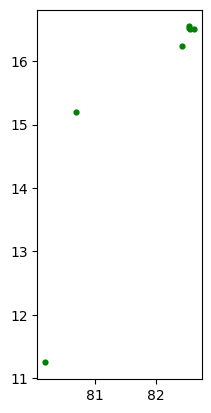

In [135]:
KGlocation=gpd.read_file(r"D:\Maps\generatedmaps\KGpoints.shp")
KGlocation.plot(color='green',marker='o',markersize=12)

In [136]:
type(KGlocation)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

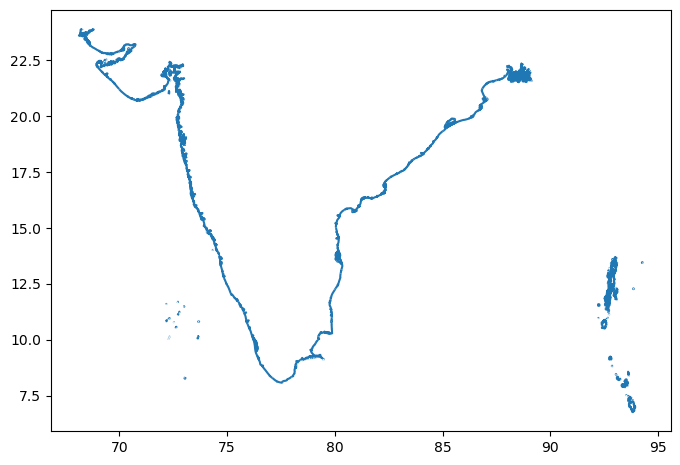

In [137]:
Costl_map = gpd.read_file(r'D:\Maps\India_Coastal\coastl_ind.shp')
fig,ax = plot.subplots(figsize = (8,8))
Costl_map.plot(ax = ax)

In [155]:
Costl_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [156]:
KGlocation.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [139]:
# Costl_map_24373=Costl_map.to_crs(24373)

In [140]:
# fig,ax = plot.subplots(figsize = (8,8))
# Costl_map_24373.plot(ax = ax)

<AxesSubplot:>

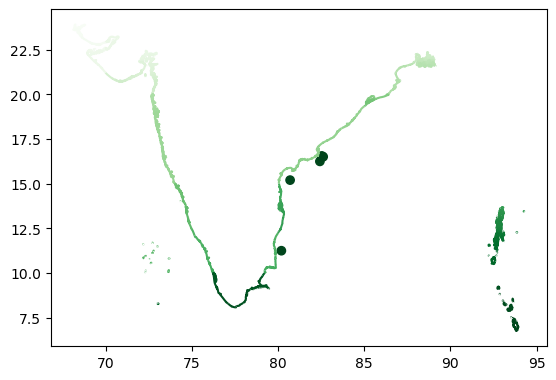

In [163]:
union=gpd.overlay(Cost_map,KGlocation,how='union',keep_geom_type=False)
union.plot(cmap='Greens')


<AxesSubplot:>

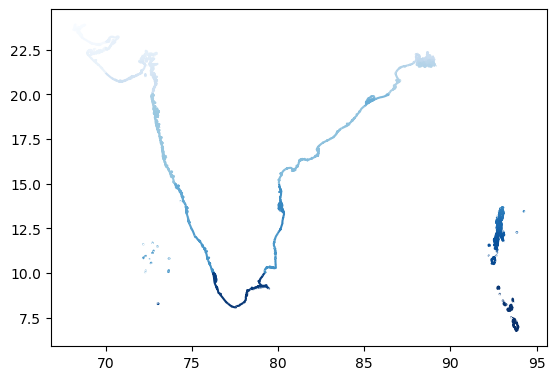

In [147]:
union=gpd.overlay(Cost_map,KGlocation,how='identity',keep_geom_type=False)
union.plot(cmap='Blues')

In [154]:
crs.Costl_map()

NameError: name 'crs' is not defined

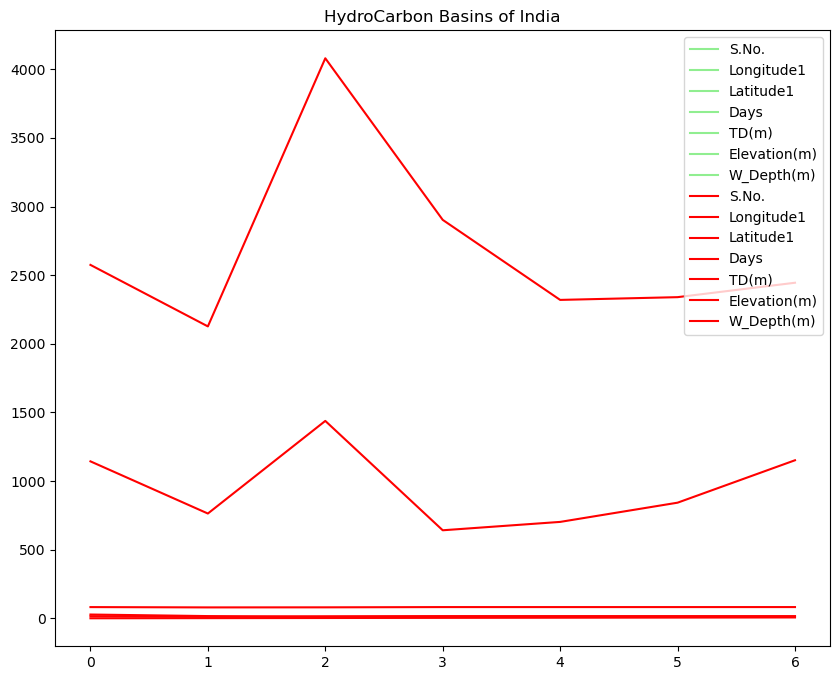

In [149]:
axis=KG_df[KG_df.Well_Name=='Asia'].plot(color='lightgreen')
KG_df.plot(ax=axis,color='red')
plot.title("HydroCarbon Basins of India")
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(10,8)
fig.savefig('D:\Maps\generatedmaps\Ind_HydroCarbons1.png',dpi=800)
plot.show()